# cylinder Data Processing

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

from fatiando import utils
from matplotlib import colors, ticker, cm
from IPython.display import Image as img

# Importing the background

In [75]:
bname = 'back/Data_20190724_150326_back1.dat'

In [76]:
back1 = pd.read_csv(bname, skiprows=2, delim_whitespace=True, usecols=(3, 9, 10, 11), header=None, names=['V', 'Sx', 'Sy', 'Sz'], nrows=1022)

back2 = pd.read_csv(bname, skiprows=1024, delim_whitespace=True, usecols=(3, 5, 6, 7), header=None, names=['V', 'Sx', 'Sy', 'Sz'])

back = pd.concat([back1, back2])

volt = back['V'].get_values()
train_dist = (volt - volt[0])*129.6/(volt[0] - volt[-1])
print train_dist

sy_dist = train_dist
sz_dist = train_dist - 1.5
sx_dist = train_dist - 3.

maskz = (sz_dist <= 0.) & (sz_dist >= -133.6)

dz = {'Sz': back['Sz'].get_values(), 'Sz_dist': sz_dist}
dz = pd.DataFrame(data=dz)
dz = dz[maskz].reset_index().drop(labels='index', axis=1)

masky = (sy_dist >= -133.6)

dy = {'Sy': back['Sy'].get_values(), 'Sy_dist': sy_dist}
dy = pd.DataFrame(data=dy)
dy = dy[masky].reset_index().drop(labels='index', axis=1)

maskx = (sx_dist <= 0.) & (sx_dist >= -133.6)

dx = {'Sx': back['Sx'][:], 'Sx_dist': sx_dist}
dx = pd.DataFrame(data=dx)
dx = dx[maskx].reset_index().drop(labels='index', axis=1)

size = np.array([sx_dist[maskx].size, sy_dist[masky].size, sz_dist[maskz].size])

lim = np.min(size)
print lim

df = {'Sx': dx['Sx'][:lim], 'Sy': dy['Sy'][:lim], 'Sz': dz['Sz'][:lim]}
df = pd.DataFrame(data=df)

dw = {'Line': np.ones(lim, dtype=np.int8) + 0}
back_dfw = pd.DataFrame(data=dw)
back_dfw
back_dfw.loc[:, 'X'] = 0.
back_dfw.loc[:, 'Y'] = dx['Sx_dist']
back_dfw.loc[:, 'Bx'] = (df['Sy'] - df['Sx'])/np.sqrt(2.)
back_dfw.loc[:, 'By'] = - df['Sz']
back_dfw.loc[:, 'Bz'] = (df['Sy'] + df['Sx'])/np.sqrt(2.)
back_dfw.loc[:, 'Bm'] = np.sqrt(back_dfw['Bx']**2. + back_dfw['By']**2. + back_dfw['Bz']**2.)

[  0.00000000e+00  -2.81030445e-02  -2.81030445e-02 ...,  -1.29602810e+02
  -1.29602810e+02  -1.29600000e+02]
3000


### Reading train data files

In [77]:
existing_file = glob.glob("*.csv")
existing_file

['cylinder_data.csv']

In [78]:
if existing_file != []:
    for i in range(len(existing_file)):
        os.remove(existing_file[i])   

In [79]:
fnames = sorted(glob.glob('*.dat'))
fnames

['Data_20190724_150652_40.dat',
 'Data_20190724_150748_36.dat',
 'Data_20190724_150910_32.dat',
 'Data_20190724_151001_28.dat',
 'Data_20190724_151051_26.dat',
 'Data_20190724_151245_24.dat',
 'Data_20190724_151334_22.dat',
 'Data_20190724_151420_20.dat',
 'Data_20190724_151512_18.dat',
 'Data_20190724_151602_16.dat',
 'Data_20190724_151652_14.dat',
 'Data_20190724_151742_12.dat',
 'Data_20190724_151832_08.dat',
 'Data_20190724_151918_04.dat',
 'Data_20190724_152050_00.dat']

In [80]:
for n, name in enumerate(fnames):

    print n, name
    data1 = pd.read_csv(name, skiprows=2, delim_whitespace=True, usecols=(3, 9, 10, 11), header=None, names=['V', 'Sx', 'Sy', 'Sz'], nrows=1022)

    data2 = pd.read_csv(name, skiprows=1024, delim_whitespace=True, usecols=(3, 5, 6, 7), header=None, names=['V', 'Sx', 'Sy', 'Sz'])

    data = pd.concat([data1, data2])

    volt = data['V'].get_values()
    train_dist = (volt - volt[0])*129.6/(volt[0] - volt[-1])
    print train_dist

    sy_dist = train_dist
    sz_dist = train_dist - 1.5
    sx_dist = train_dist - 3.

    maskz = (sz_dist <= 0.) & (sz_dist >= -133.6)

    dz = {'Sz': data['Sz'].get_values(), 'Sz_dist': sz_dist}
    dz = pd.DataFrame(data=dz)
    dz = dz[maskz].reset_index().drop(labels='index', axis=1)

    masky = (sy_dist >= -133.6)

    dy = {'Sy': data['Sy'].get_values(), 'Sy_dist': sy_dist}
    dy = pd.DataFrame(data=dy)
    dy = dy[masky].reset_index().drop(labels='index', axis=1)

    maskx = (sx_dist <= 0.) & (sx_dist >= -133.6)

    dx = {'Sx': data['Sx'][:], 'Sx_dist': sx_dist}
    dx = pd.DataFrame(data=dx)
    dx = dx[maskx].reset_index().drop(labels='index', axis=1)

    size = np.array([sx_dist[maskx].size, sy_dist[masky].size, sz_dist[maskz].size])

    lim = np.min(size)
    print lim

    df = {'Sx': dx['Sx'][:lim], 'Sy': dy['Sy'][:lim], 'Sz': dz['Sz'][:lim]}
    df = pd.DataFrame(data=df)

    dw = {'Line': np.ones(lim, dtype=np.int8) + n}
    dfw = pd.DataFrame(data=dw)
    dfw
    if n<4:
        dfw.loc[:, 'X'] = n*4.
    elif n>=4 and n<=11:
        dfw.loc[:, 'X'] = n*2. + 6.
    else:
        dfw.loc[:, 'X'] = (n-4)*4.
    dfw.loc[:, 'Y'] = dx['Sx_dist']
    dfw.loc[:, 'Bx'] = (df['Sy'] - df['Sx'])/np.sqrt(2.)
    dfw.loc[:, 'By'] = - df['Sz']
    dfw.loc[:, 'Bz'] = (df['Sy'] + df['Sx'])/np.sqrt(2.)
    dfw.loc[:, 'Bm'] = np.sqrt(dfw['Bx']**2. + dfw['By']**2. + dfw['Bz']**2.)
    dfw.loc[:, 'Bm_res'] = dfw['Bm'] - back_dfw['Bm']

    if n == 0:
        header = True
    else:
        header = False
    dfw.to_csv('cylinder_data.csv', index=None, sep=',', mode='a', header=header)

0 Data_20190724_150652_40.dat
[  0.00000000e+00   2.83650689e-03   2.83650689e-03 ...,  -1.29585817e+02
  -1.29591490e+02  -1.29600000e+02]
3000
1 Data_20190724_150748_36.dat
[  0.00000000e+00  -1.41315015e-02  -1.97841021e-02 ...,  -1.29591521e+02
  -1.29600000e+02  -1.29600000e+02]
3000
2 Data_20190724_150910_32.dat
[  0.00000000e+00  -2.26464549e-02  -1.41540343e-02 ...,  -1.29600000e+02
  -1.29605662e+02  -1.29600000e+02]
3000
3 Data_20190724_151001_28.dat
[  0.00000000e+00  -5.70121415e-03  -1.99542495e-02 ...,  -1.29597149e+02
  -1.29591448e+02  -1.29600000e+02]
2980
4 Data_20190724_151051_26.dat
[  0.00000000e+00   5.52159001e-03  -2.76079501e-03 ...,  -1.29619326e+02
  -1.29611043e+02  -1.29600000e+02]
3000
5 Data_20190724_151245_24.dat
[  0.00000000e+00   0.00000000e+00  -8.47206485e-03 ...,  -1.29585880e+02
  -1.29591528e+02  -1.29600000e+02]
3000
6 Data_20190724_151334_22.dat
[  0.00000000e+00   1.96270174e-02   1.96270174e-02 ...,  -1.29616823e+02
  -1.29614019e+02  -1.2960

In [81]:
dobs = pd.read_csv('cylinder_data.csv')

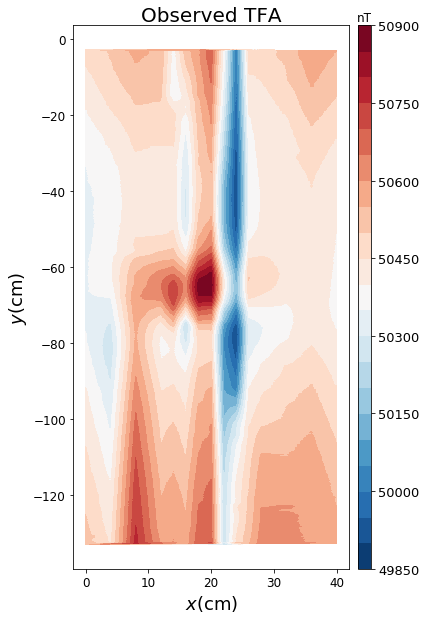

In [87]:
plt.figure(figsize=(6,10))
plt.title('Observed TFA', fontsize=20)
plt.tricontourf(dobs['X'], dobs['Y'], dobs['Bm'], 20, cmap='RdBu_r').ax.tick_params(labelsize=12)
plt.xlabel('$x$(cm)', fontsize=18)
plt.ylabel('$y$(cm)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
#plt.savefig(mypath+'diorama_tfa_pred_data_true_inital.png', dpi=300)
plt.show()

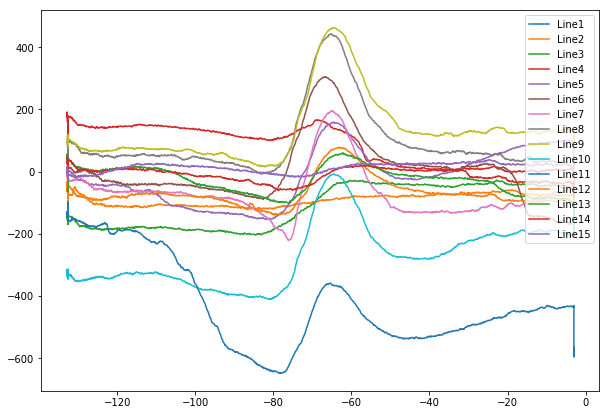

In [83]:
line = []
plt.figure(figsize=(10,7))
for i in range(15):
    mask = (dobs['Line'] == i)
    plt.plot(dobs[mask]['Y'], dobs[mask]['Bm_res'])
    line.append('Line'+str(i+1))
plt.legend(line,loc=1)
plt.show()

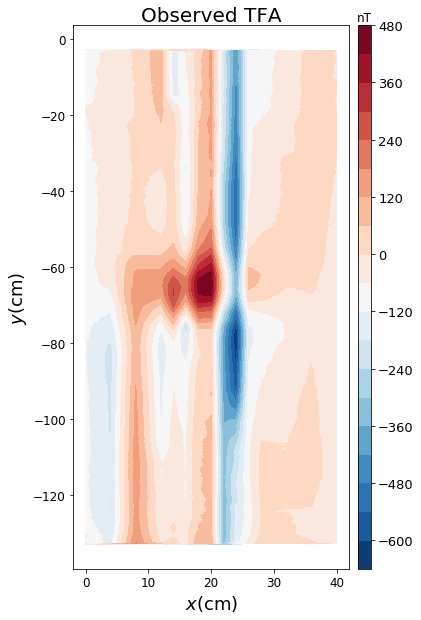

In [86]:
plt.figure(figsize=(6,10))
plt.title('Observed TFA', fontsize=20)
plt.tricontourf(dobs['X'], dobs['Y'], dobs['Bm_res'], 20, cmap='RdBu_r').ax.tick_params(labelsize=12)
plt.xlabel('$x$(cm)', fontsize=18)
plt.ylabel('$y$(cm)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
#plt.savefig(mypath+'diorama_tfa_pred_data_true_inital.png', dpi=300)
plt.show()

In [85]:
dobs['Line']

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
44930    15
44931    15
44932    15
44933    15
44934    15
44935    15
44936    15
44937    15
44938    15
44939    15
44940    15
44941    15
44942    15
44943    15
44944    15
44945    15
44946    15
44947    15
44948    15
44949    15
44950    15
44951    15
44952    15
44953    15
44954    15
44955    15
44956    15
44957    15
44958    15
44959    15
Name: Line, Length: 44960, dtype: int64